<a href="https://colab.research.google.com/github/harshit05092/Job-application-portal/blob/main/HOUSE_PRICE_PREDICTION_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [3]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# There are 20640 rows and total_bedrooms has 207 missing value with can be filled using simple imputer from sklearn
# We have to find the price of a particular house if its complete details are provided
# ocean_proximity is a categorical column

In [6]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing['population'].sum()

np.float64(29421840.0)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

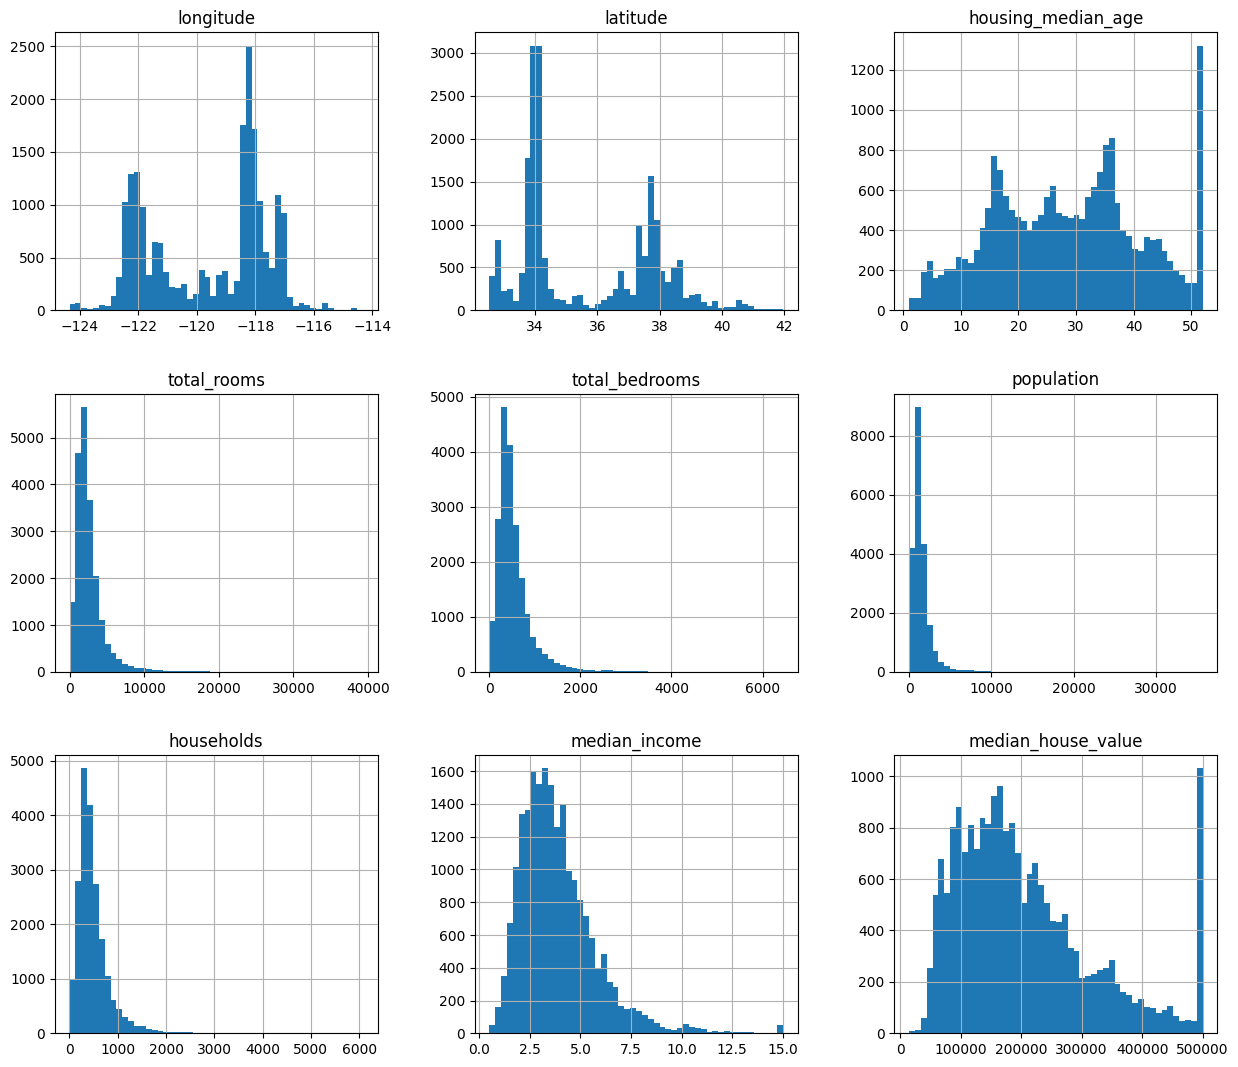

In [9]:
housing.hist(bins = 50, figsize = (15,13))

In [10]:
# ocean_proximity has 5 categories

In [11]:
# Most of the housing_median_age is between 10 and 40 while there are great number of houses with age greater than 50
# total_rooms tells us the total number of room in a particular block and same with population
# Average household income of california state is between 15k to 50k while there are also outliers
# median_house_value graph is skewed while there are outliers


<Axes: >

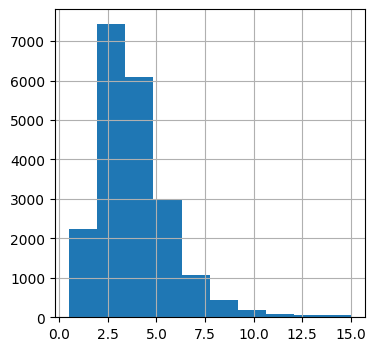

In [12]:
housing['median_income'].hist(figsize=(4,4))

In [13]:
housing['income_cat'] = housing['median_income'] / 1.5
# Diving median_income into five categories for better understanding and stratified test train split
housing['income_cat'].where(housing['income_cat'] < 5, other= 5.0, inplace=True)
# Keeping the highest income in bar 5

<ipython-input-13-ac69e6575542>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['income_cat'].where(housing['income_cat'] < 5, other= 5.0, inplace=True)


In [14]:
# Another way of doing same thing is
import numpy as np
housing['income_catg'] = pd.cut(housing['median_income'], bins = [0,1.5,3,4.5,6, np.inf], labels = [1,2,3,4,5])
# housing['income_cat'] and housing['income_catg'] are same

<Axes: xlabel='income_catg'>

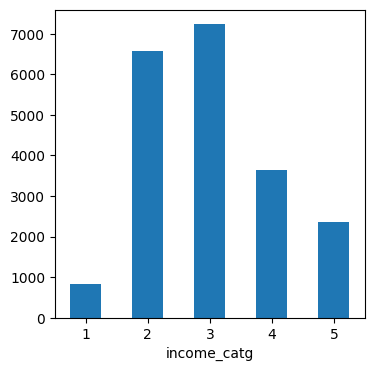

In [15]:
housing['income_catg'].value_counts().sort_index().plot.bar(rot=0,figsize=(4,4))

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state=29)
spilt_test = []
for train_index, test_index in splitter.split(housing, housing['income_catg']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    spilt_test.append([strat_train_set, strat_test_set])

In [17]:
# Another method of stratified train test splitt
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(housing,stratify = housing['income_catg'], test_size = 0.2, random_state = 29 )# stratified sampling
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 29) # Random sampling

In [18]:
housing['income_catg'].value_counts().sort_index() / len(housing)

,count
income_catg,
1,0.039826
2,0.318847
3,0.350581
4,0.176308
5,0.114438


In [19]:
def income_cat_proportion(data):
  return data['income_catg'].value_counts().sort_index() / len(data)

compare_props = pd.DataFrame({
    "Overall" : income_cat_proportion(housing),
    "Stratified" : income_cat_proportion(strat_train_set),
    "Random" : income_cat_proportion(train_set)
})
compare_props['Stratified_Error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100
compare_props['Random_Error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100

In [20]:
compare_props

,Overall,Stratified,Random,Stratified_Error,Random_Error
income_catg,,,,,
1,0.039826,0.039789,0.039910,-0.091241,0.212895
2,0.318847,0.318859,0.321463,0.003799,0.820544
3,0.350581,0.350594,0.347020,0.003455,-1.015755
4,0.176308,0.176296,0.177386,-0.006870,0.611432
5,0.114438,0.114462,0.114220,0.021169,-0.190517


In [21]:
for items in (strat_train_set, strat_test_set):
  items.drop(columns = ['income_catg'], inplace = True)

In [22]:
housing = strat_train_set.copy()

<Axes: xlabel='latitude', ylabel='longitude'>

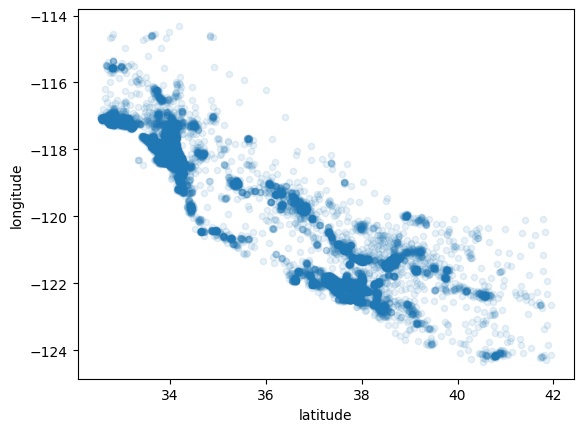

In [23]:
housing.plot(x = 'latitude', y = 'longitude', kind = 'scatter', alpha = 0.1)

<Axes: xlabel='latitude', ylabel='longitude'>

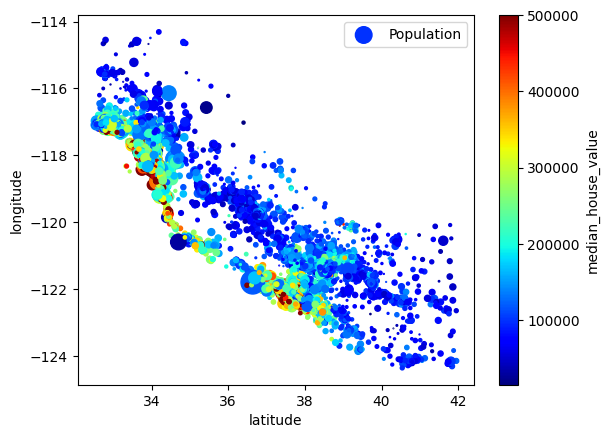

In [24]:
housing.plot(x = 'latitude', y = 'longitude', kind = 'scatter',
             s= housing['population'] / 100, label='Population' ,
             c = 'median_house_value', cmap = 'jet', colorbar = True, sharex=False)

In [25]:
# Looking for correlation. It will give pearson's coeffecient which is between -1 and 1

corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.687694
income_cat,0.683944
total_rooms,0.135809
housing_median_age,0.100911
households,0.068280
total_bedrooms,0.052380
population,-0.022477
longitude,-0.041263
latitude,-0.148211


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

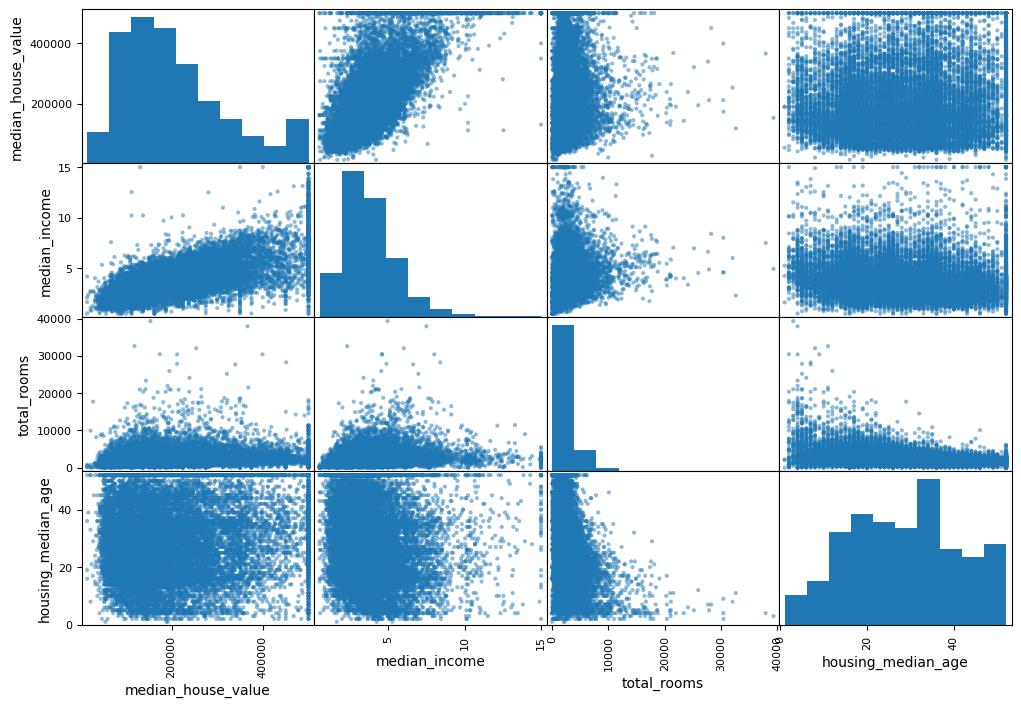

In [26]:
# Since we can see that median_house_value is highly correlated to median_income, total_rooms, housing_median_age
imp_attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
from pandas.plotting import scatter_matrix
scatter_matrix(housing[imp_attributes], figsize = (12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

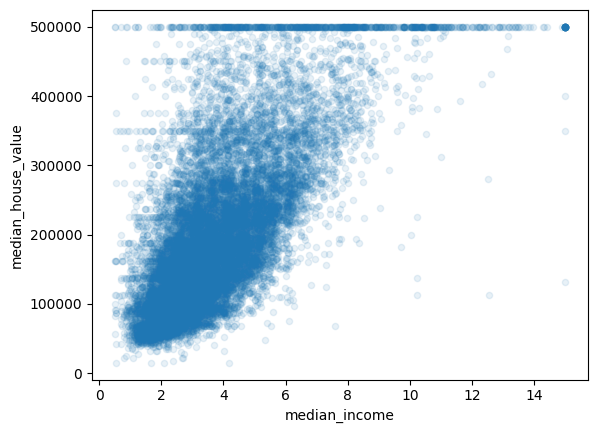

In [27]:
# now focusing on median_income and median_house_value

housing.plot(x = 'median_income', y = 'median_house_value', kind = 'scatter', alpha = 0.1)

In [28]:
# We need to make new features for our machine learning algorithm to work better

housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [29]:
corr_matrix = housing.corr(numeric_only= True)
corr_matrix['median_house_value'].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.687694
income_cat,0.683944
rooms_per_household,0.163619
total_rooms,0.135809
housing_median_age,0.100911
households,0.068280
total_bedrooms,0.052380
population,-0.022477
population_per_household,-0.027508


(np.float64(0.0), np.float64(5.0), np.float64(0.0), np.float64(520000.0))

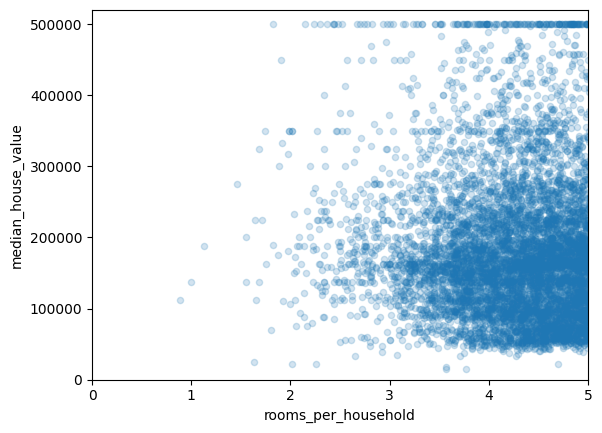

In [30]:
# bedrooms_per_room is correlated in a reciprocative way
import matplotlib.pyplot as plt
housing.plot(kind='scatter', y = 'median_house_value', x = 'rooms_per_household', alpha = 0.2)
plt.axis([0,5,0,520000])

In [31]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16347.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16347.000000,16512.000000
mean,-119.568656,35.633126,28.631056,2637.034218,537.278706,1424.127301,499.253634,3.872666,206636.335635,2.521211,5.432484,0.212612,3.061783
std,2.004436,2.135449,12.601312,2190.015524,421.579469,1113.711773,383.198900,1.904945,115828.864655,1.072667,2.370351,0.056993,10.779642
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.333267,0.888889,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1443.000000,294.000000,784.000000,278.000000,2.565750,118800.000000,1.710500,4.443658,0.175205,2.431483
50%,-118.490000,34.260000,29.000000,2131.000000,434.000000,1167.500000,409.000000,3.531300,179400.000000,2.354200,5.230769,0.203184,2.825156
75%,-118.000000,37.720000,37.000000,3155.250000,647.000000,1727.000000,605.250000,4.745325,264500.000000,3.163550,6.058824,0.239637,3.286539
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000,5.000000,141.909091,1.000000,1243.333333


In [32]:
# Preparing the dataset for machine learning algorithm
# We are removing y vlaues since we dont want our model to have y values
housing = strat_train_set.drop(columns = ['median_house_value'], axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [33]:
# We need to handle missing values. total_bedrooms has 207 missing value with can be filled using simple imputer from sklearn

# 1st option

housing_option_1 = housing.copy()
median = housing['total_bedrooms'].median()
housing_option_1.fillna({'total_bedrooms' : median}, inplace = True)

In [34]:
# 2nd option is we simply use simpleimputer from sklearn
housing_nums = housing.drop(columns = ['ocean_proximity'], axis = 1)
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy = 'median')
impute.fit(housing_nums)

SimpleImputer(strategy='median')

In [35]:
impute.statistics_

array([-118.49  ,   34.26  ,   29.    , 2131.    ,  434.    , 1167.5   ,
        409.    ,    3.5313,    2.3542])

In [36]:
housing_nums.median().values

array([-118.49  ,   34.26  ,   29.    , 2131.    ,  434.    , 1167.5   ,
        409.    ,    3.5313,    2.3542])

In [37]:
X = impute.transform(housing_nums)

In [38]:
housing_tr = pd.DataFrame(X, columns = housing_nums.columns, index = housing_nums.index)

In [39]:
housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat


In [40]:
housing_cat = housing['ocean_proximity']
housing_cat.head()

,ocean_proximity
7551,INLAND
17902,<1H OCEAN
5052,NEAR OCEAN
4749,<1H OCEAN
14772,INLAND


In [41]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()
housing_cat_ordinal = ordinal.fit_transform(housing_cat.values.reshape(-1,1))
housing_cat_ordinal[:10]

array([[1.],
       [0.],
       [4.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [42]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
housing_cat_one_hot = one_hot.fit_transform(housing_cat.values.reshape(-1,1))
housing_cat_one_hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributes(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

In [67]:
attribs_adder = CombinedAttributes(add_bedrooms_per_room=False)
housing_extra_attribs = attribs_adder.transform(housing.values)

In [68]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index
)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
7551,-122.05,38.25,37.0,1336.0,251.0,680.0,231.0,3.815,INLAND,2.543333,5.78355,2.943723
17902,-121.95,37.21,20.0,2345.0,322.0,890.0,276.0,10.0187,<1H OCEAN,5.0,8.496377,3.224638
5052,-119.27,34.28,50.0,1710.0,412.0,915.0,380.0,3.1757,NEAR OCEAN,2.117133,4.5,2.407895
4749,-118.14,34.03,45.0,1569.0,359.0,1203.0,359.0,2.4612,<1H OCEAN,1.6408,4.370474,3.350975
14772,-118.73,36.01,14.0,3263.0,651.0,1910.0,594.0,2.8603,INLAND,1.906867,5.493266,3.215488


In [69]:
# Now setting up pipelines
# For numeric columns only
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(
    [('imputer', SimpleImputer(strategy='median')),
    ('attributes_adder', CombinedAttributes()),
    ('Standard_scaler', StandardScaler())]
)
housing_num_tr = num_pipeline.fit_transform(housing_nums)
housing_num_tr

array([[-1.23796395,  1.22548181,  0.66415283, ...,  0.14811165,
        -0.01095246, -0.3949677 ],
       [-1.18807309,  0.73844999, -0.68495387, ...,  1.29262956,
         0.01510808, -1.18102332],
       [ 0.14900213, -0.63366848,  1.69582266, ..., -0.39340673,
        -0.06066138,  0.42996411],
       ...,
       [ 0.198893  , -0.68986446, -0.92303152, ..., -0.02982568,
         0.09929489, -0.31017539],
       [ 0.61797627, -0.81162241, -0.60559465, ..., -0.69550019,
         0.01080222,  1.35552046],
       [ 1.20169941, -1.32675221,  0.66415283, ..., -0.06644104,
        -0.03936084, -0.40539117]])

In [70]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attributes_name):
    self.attributes_name = attributes_name
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    return X[self.attributes_name].values

In [71]:
nums_attribs = list(housing_nums)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(nums_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributes()),
    ('std_scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse_output=False))
])

In [72]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
7551,-122.05,38.25,37.0,1336.0,251.0,680.0,231.0,3.8150,INLAND,2.543333
17902,-121.95,37.21,20.0,2345.0,322.0,890.0,276.0,10.0187,<1H OCEAN,5.000000
5052,-119.27,34.28,50.0,1710.0,412.0,915.0,380.0,3.1757,NEAR OCEAN,2.117133
4749,-118.14,34.03,45.0,1569.0,359.0,1203.0,359.0,2.4612,<1H OCEAN,1.640800
14772,-118.73,36.01,14.0,3263.0,651.0,1910.0,594.0,2.8603,INLAND,1.906867


In [73]:
housing.drop(columns = ['income_cat'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7551,-122.05,38.25,37.0,1336.0,251.0,680.0,231.0,3.8150,INLAND
17902,-121.95,37.21,20.0,2345.0,322.0,890.0,276.0,10.0187,<1H OCEAN
5052,-119.27,34.28,50.0,1710.0,412.0,915.0,380.0,3.1757,NEAR OCEAN
4749,-118.14,34.03,45.0,1569.0,359.0,1203.0,359.0,2.4612,<1H OCEAN
14772,-118.73,36.01,14.0,3263.0,651.0,1910.0,594.0,2.8603,INLAND
...,...,...,...,...,...,...,...,...,...
15942,-118.40,33.99,36.0,1280.0,240.0,704.0,217.0,5.9632,<1H OCEAN
3050,-119.80,36.72,19.0,1334.0,336.0,1171.0,319.0,1.0481,INLAND
19999,-119.17,34.16,17.0,5276.0,1020.0,4066.0,984.0,4.5828,NEAR OCEAN
5973,-118.33,33.90,21.0,6603.0,1984.0,5546.0,1745.0,2.6091,<1H OCEAN


In [74]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [75]:
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 DataFrameSelector(attributes_name=['longitude',
                                                                                    'latitude',
                                                                                    'housing_median_age',
                                                                                    'total_rooms',
                                                                                    'total_bedrooms',
                                                                                    'population',
                                                                                    'households',
                                                                                    'median_income',
                                                                                    'income_cat'])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('attribs_adder',
                                                 CombinedAttributes()),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                Pipeline(steps=[('selector',
                                                 DataFrameSelector(attributes_name=['ocean_proximity'])),
                                                ('cat_encoder',
                                                 OneHotEncoder(sparse_output=False))]))])

In [76]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.23796395,  1.22548181,  0.66415283, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18807309,  0.73844999, -0.68495387, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14900213, -0.63366848,  1.69582266, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.198893  , -0.68986446, -0.92303152, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.61797627, -0.81162241, -0.60559465, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.20169941, -1.32675221,  0.66415283, ...,  0.        ,
         0.        ,  1.        ]])

In [77]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [78]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Actual data:", list(some_labels))

Predictions: [182118.26272164 437661.52579447 253658.72240638 166460.87147764
  80705.45629044]
Actual data: [99000.0, 500001.0, 206300.0, 180500.0, 128900.0]


In [79]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(67607.41842379372)

In [80]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [81]:
tree_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [83]:
def display_scores(scores):
  print("Scores:", tree_rmse_scores)
  print("Mean:", tree_rmse_scores.mean())
  print("Standard deviation:", tree_rmse_scores.std())

display_scores(tree_rmse_scores)

Scores: [69957.48143092 66405.74175057 70287.24545708 72735.10100221
 68638.75929157 69936.47027167 71050.07998889 71459.54762398
 73367.67273855 67592.59526747]
Mean: 70143.06948229225
Standard deviation: 2061.6953128960076


In [84]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [85]:
def display_scores(scores):
  print("Scores:", lin_rmse_scores)
  print("Mean:", lin_rmse_scores.mean())
  print("Standard deviation:", lin_rmse_scores.std())

display_scores(lin_rmse_scores)

Scores: [66814.89619516 63300.65948549 68520.76754852 66982.790026
 68413.64324777 70157.06902769 67770.40474111 69106.17559947
 70813.33468631 66919.63583218]
Mean: 67879.93763897048
Standard deviation: 1995.8071631244432


In [86]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=29)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=29)

In [87]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
display_scores(forest_rmse)

Scores: [66814.89619516 63300.65948549 68520.76754852 66982.790026
 68413.64324777 70157.06902769 67770.40474111 69106.17559947
 70813.33468631 66919.63583218]
Mean: 67879.93763897048
Standard deviation: 1995.8071631244432


In [88]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators' : [3,10,30], 'max_features':[2]},
    {'bootstrap' : [False], 'n_estimators' : [3,10], 'max_features':[2,3,4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2], 'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [89]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [90]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10)

In [91]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
  print(np.sqrt(-mean_score), params)

63601.373675515926 {'max_features': 2, 'n_estimators': 3}
55303.7896225242 {'max_features': 2, 'n_estimators': 10}
53039.05491434388 {'max_features': 2, 'n_estimators': 30}
62562.57570467554 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54229.995926846015 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60374.01603679357 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53189.56677470776 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
60279.22286227453 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
52672.15161408398 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [92]:
pd.DataFrame(cv_res).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.086482,0.003792,0.003565,0.000135,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.805434e+09,-4.324729e+09,...,-4.045135e+09,2.005738e+08,9,-1.092063e+09,-1.077167e+09,-1.105567e+09,-1.146214e+09,-1.088852e+09,-1.101973e+09,2.389944e+07
1,0.274580,0.006530,0.010067,0.000414,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.977052e+09,-3.108482e+09,...,-3.058509e+09,5.736231e+07,5,-5.832867e+08,-5.720426e+08,-5.894804e+08,-5.545886e+08,-5.668281e+08,-5.732453e+08,1.228909e+07
2,0.823491,0.008981,0.031428,0.000492,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.720812e+09,-2.859196e+09,...,-2.813141e+09,9.115358e+07,2,-4.452765e+08,-4.367406e+08,-4.406727e+08,-4.322851e+08,-4.241251e+08,-4.358200e+08,7.253809e+06
3,0.123652,0.003651,0.004344,0.000103,2,3,False,"{'bootstrap': False, 'max_features': 2, 'n_est...",-3.956845e+09,-4.024396e+09,...,-3.914076e+09,1.896882e+08,8,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
4,0.394959,0.004083,0.012810,0.000232,2,10,False,"{'bootstrap': False, 'max_features': 2, 'n_est...",-2.857642e+09,-3.004338e+09,...,-2.940892e+09,7.486280e+07,4,-0.000000e+00,-5.270649e+01,-9.462528e+02,-0.000000e+00,-2.365632e+02,-2.471045e+02,3.602309e+02


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
    'n_estimators' : randint(low=1, high=200),
    'max_features' : randint(low=1, high=8)
}
forest_reg = RandomForestRegressor(random_state=29)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=29)
rnd_search.fit(housing_prepared, housing_labels)